In [18]:
from MachineLearning.DDPMUnet.diffusion_model import DiffusionModel
from MachineLearning.DDPMUnet.ddpm_unet import build_model
from MachineLearning.DDPMUnet.diffusion_utils import GaussianDiffusion
from MachineLearning.dataset import get_dataset

TRAINING_CONFIG = {
            "Name": "DDPM Diffusion",
            "optimizer": "adam",
            "loss": "mean_squared_error",
            "metric": "mean_absolute_error",
            "learning_rate": 0.0003,
            "epoch": 1,
            "batch_size": 32,
            "total_timesteps": 6
        }

MODEL_CONFIG = {
    "img_size": (112, 224, 1),
    "output_size": (112, 224, 1),
    "has_attention": [False, False, True],
    "interpolation": "bilinear",
    "widths": [16, 32, 64],
    "norm_groups": 4
}

network_path = "/nesi/project/uoa03669/ewin313/TropicalCycloneAI/models/DDPM-Diffusion_1718580018.6798809.keras"

network = build_model(**MODEL_CONFIG)
network.load_weights(network_path)


In [21]:
data_folder = "/nesi/project/uoa03669/ewin313/storm_data/v5"
validation_data = get_dataset(data_folder, dataset="validation", data_version=4)

validation_example_in, validation_example_out = next(iter(validation_data))

# Get an instance of the Gaussian Diffusion utilities
gdf_util = GaussianDiffusion(timesteps=TRAINING_CONFIG["total_timesteps"])

model = DiffusionModel(
        network=network,
        ema_network=network,
        gdf_util=gdf_util,
        img_size=MODEL_CONFIG["img_size"],
        timesteps=TRAINING_CONFIG["total_timesteps"],
        plot_conditioning_images=validation_example_in
    )



create dataset time: 0.029555082321166992
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717569136.1850202.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.7376506.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.5460758.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.638054.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568341.0711763.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.633827.hdf5
/nesi/project/uoa03669/ewin313/storm_data/v5/AllData_1717568200.5788093.hdf5


generating images


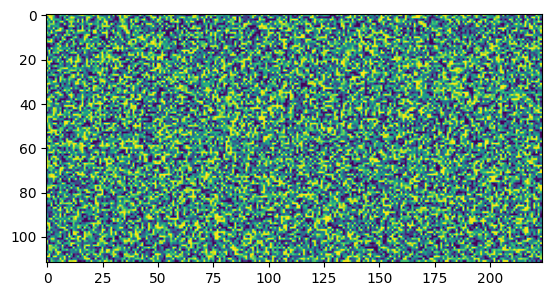

In [22]:
model.plot_images(epoch = 22)